In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Datos


In [2]:
link = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSFa9gjOa3NgXlS-hRN9SgOYCEFjuuYvZVbwEjF9f757qiIOBcNXwKse_CZcot1Nw/pub?gid=1224452159&single=true&output=csv'

In [3]:
# MS : indica frecuencia mensual

df = pd.read_csv(link,index_col='Fecha',parse_dates=True)
df.head()

,PresionAire (mbar),PresionVapor (mbar),HumedadRelativa (%),ConcentracionVapor (mmol/mol),DensidadAire (g/m**3),DireccionViento (grado),Temperatura (C)
Fecha,,,,,,,
2010-01-01,970.000208,4.348264,94.777778,4.483333,1252.657986,64.320278,-3.863403
2010-02-01,985.915486,3.793889,91.520833,3.849444,1280.425208,238.964236,-5.296667
2010-03-01,990.590625,4.049236,92.757639,4.087569,1283.044514,132.256944,-4.605903
2010-04-01,988.882014,3.467292,90.650694,3.505417,1289.135417,145.993472,-6.284306
2010-05-01,981.295347,2.385556,85.181528,2.431111,1299.386597,165.373125,-10.286736


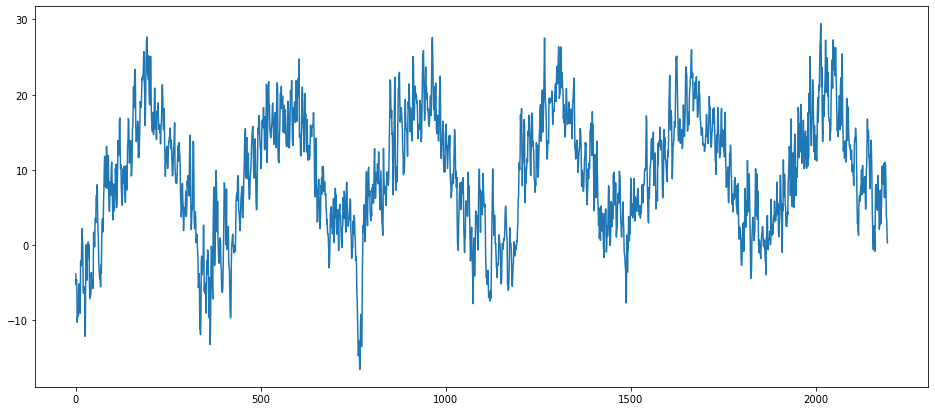

In [7]:
# iloc[filas,columnas]
plt.figure(figsize = (16,7))
plt.plot(np.linspace(0,len(df),len(df)),df.iloc[:,-1].values)

In [8]:
# selecciono la variable de interés y se transforma fecha a índice

df = df[['Temperatura (C)']]
df.head()

,Temperatura (C)
Fecha,
2010-01-01,-3.863403
2010-02-01,-5.296667
2010-03-01,-4.605903
2010-04-01,-6.284306
2010-05-01,-10.286736


In [9]:
# agrupar la temperatura de dia a mes

meses = df.resample('M').mean()
meses.head()

,Temperatura (C)
Fecha,
2010-01-31,1.113461
2010-02-28,3.461329
2010-03-31,7.917014
2010-04-30,8.746801
2010-05-31,9.698203


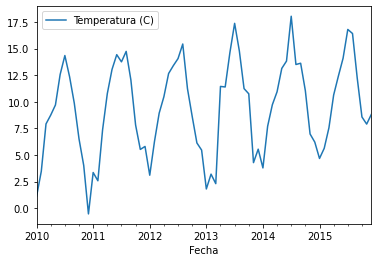

In [10]:
meses.plot()

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


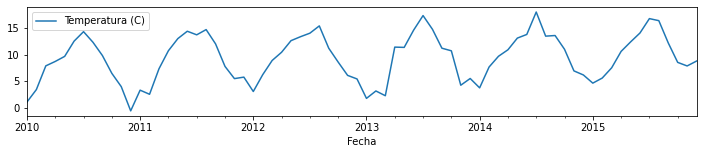

In [14]:
# serie original
results = seasonal_decompose(meses)
results.observed.plot(figsize=(12,2))

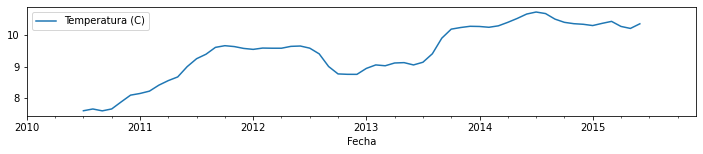

In [13]:
# tendencia de la serie
results.trend.plot(figsize=(12,2))

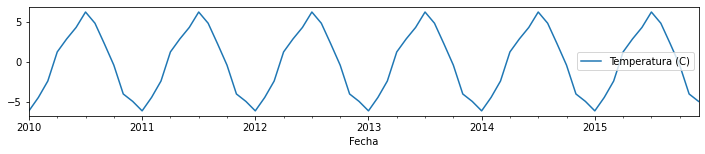

In [15]:
#estacionalidad
results.seasonal.plot(figsize=(12,2))

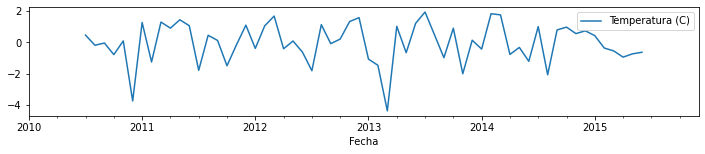

In [16]:
# residuos
results.resid.plot(figsize=(12,2))

## Train Test Split

In [17]:
df = meses

In [18]:
len(df)

72

In [54]:
# longitud data de entrenamiento
test_size = 12
len(df) - test_size

60

In [55]:
train = df.iloc[:len(df)-test_size]
test = df.iloc[len(df)- test_size:]

In [56]:
len(test)

12

## Escalando los datos

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler = MinMaxScaler()

In [59]:
# escalamos la data de entrenamiento
scaler.fit(train)

MinMaxScaler()

In [60]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

Este generador toma una secuencia de puntos de datos y crea un dataframe osea convierte,la serie (vector columna) a matriz (regresores y target)

In [61]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [62]:
scaled_train

array([[0.08904959],
       [0.21543496],
       [0.45528378],
       [0.49995109],
       [0.55116494],
       [0.70551831],
       [0.8012439 ],
       [0.69391063],
       [0.55978534],
       [0.37976113],
       [0.24490415],
       [0.        ],
       [0.20948107],
       [0.16768955],
       [0.42576829],
       [0.60844079],
       [0.73105166],
       [0.8055799 ],
       [0.76925578],
       [0.82221415],
       [0.6775319 ],
       [0.44971908],
       [0.32623943],
       [0.34128413],
       [0.19578437],
       [0.36607718],
       [0.50978856],
       [0.59298564],
       [0.71028701],
       [0.7500508 ],
       [0.78589902],
       [0.85951435],
       [0.63373471],
       [0.49339577],
       [0.35900898],
       [0.32285163],
       [0.12621001],
       [0.20120423],
       [0.15307839],
       [0.64492235],
       [0.64222481],
       [0.81664256],
       [0.96405579],
       [0.82474465],
       [0.63389371],
       [0.60760622],
       [0.25945528],
       [0.327

In [63]:
# Definimos el generator
n_input = 2  # es como si tuviera una matriz con 2 predictores
n_features = 1  # porque es una serie univariante
# se repite scaled_train porque el input es igual al output
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size=1)

In [64]:
len(scaled_train)

60

In [65]:
len(generator) # n_input = 2

58

In [66]:
scaled_train[:5]

array([[0.08904959],
       [0.21543496],
       [0.45528378],
       [0.49995109],
       [0.55116494]])

In [67]:
# ¿Cómo luce el primer batch?
generator[0]

(array([[[0.08904959],
         [0.21543496]]]), array([[0.45528378]]))

In [68]:
# X son los inputs , y el tercer punto (predicción en función de los 2 primeros datos)

X,y = generator[0]

In [69]:
print(f'Datos: \n{X.flatten()}')
print(f'Predicción: \n {y}')

Datos: 
[0.08904959 0.21543496]
Predicción: 
 [[0.45528378]]


Cambio los valores de n_input

In [70]:
# Vamos a redefinir para que utilice 12 meses y luego prediga el próximo mes
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [71]:
# ¿Cómo luce el primer batch?
X,y = generator[0]

In [72]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.08904959 0.21543496 0.45528378 0.49995109 0.55116494 0.70551831
 0.8012439  0.69391063 0.55978534 0.37976113 0.24490415 0.        ]
Predict this y: 
 [[0.20948107]]


### Creando el Modelo

In [73]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [74]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [75]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10400     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [76]:
# fit model
model.fit_generator(generator,epochs = 100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


48/48 [==============================] - 2s 6ms/step - loss: 0.1981
Epoch 2/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0610
Epoch 3/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0567
Epoch 4/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0655
Epoch 5/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0570
Epoch 6/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0458
Epoch 7/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0376
Epoch 8/100
48/48 [==============================] - 0s 4ms/step - loss: 0.0236
Epoch 9/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0174
Epoch 10/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0119
Epoch 11/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0134
Epoch 12/100
48/48 [==============================] - 0s 5ms/step - loss: 0.0103
Epoch 13/100
48/48 [=============================

In [77]:
model.history.history.keys()

dict_keys(['loss'])

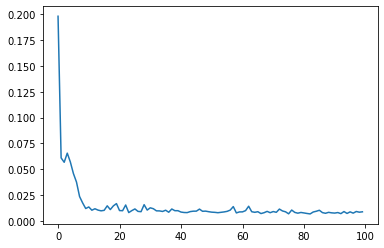

In [78]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

## Evaluando en los Datos de Prueba (Test)

In [79]:
# 12 meses de historia ---> predecir el 13 (osea el primer valor del conjunto de test)
# Necesitaremos los últimos 12 meses del conjunto de entrenamiento para predecir el 1er mes en el conjunto de prueba
first_eval_batch = scaled_train[-12:]

In [80]:
# 12 últimos valores de la data de entrenamiento
first_eval_batch

array([[0.23267759],
       [0.44343962],
       [0.55232353],
       [0.61791597],
       [0.73618213],
       [0.77312112],
       [1.        ],
       [0.75591227],
       [0.76225584],
       [0.6230671 ],
       [0.40437284],
       [0.36320737]])

In [81]:
# la forma original de first_eval_batch 
# observamos que las dimensiones no son tipo tensor 3d
first_eval_batch.shape

(12, 1)

In [82]:
X.shape  # dimensiones deseadas

(1, 12, 1)

In [83]:
# redimensionamiento (asegurando las dimensiones tipo tensor 3D)

first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [84]:
# verificamos el nuevo dimensionamiento
first_eval_batch.shape

(1, 12, 1)

In [85]:
# devuelve el mes 13 (coincide con el primer dato de test)

model.predict(first_eval_batch)

array([[0.29617617]], dtype=float32)

In [86]:
scaled_test

array([[0.28054166],
       [0.33193587],
       [0.43580447],
       [0.60148079],
       [0.69694387],
       [0.78768471],
       [0.93332105],
       [0.91261585],
       [0.68716769],
       [0.49050049],
       [0.45436992],
       [0.50383664]])

Ahora pongamos esta lógica en un bucle for para predecir el futuro para todo el rango de prueba.
----

In [87]:
# en lugar de len(test) podemos colocar la cantidad de meses a futuro que se quiere predecir

test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(2*len(test)):   ## para cambiar el número de puntos a futuro que se desea predecir , cambiar el número que esta entre parentesis() 
    
    # obtener la predicción ([0] es para obtener solo el número en lugar de [matriz])
    current_pred = model.predict(current_batch)[0]
    
    # guardar la predicción
    test_predictions.append(current_pred) 
    
    # actualizar el lote para incluir ahora la predicción y soltar primer valor
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [88]:
# y_pred
test_predictions

[array([0.29617617], dtype=float32),
 array([0.32749268], dtype=float32),
 array([0.39394668], dtype=float32),
 array([0.5077544], dtype=float32),
 array([0.6372348], dtype=float32),
 array([0.714937], dtype=float32),
 array([0.73231065], dtype=float32),
 array([0.691775], dtype=float32),
 array([0.64070725], dtype=float32),
 array([0.50420815], dtype=float32),
 array([0.35114685], dtype=float32),
 array([0.2808841], dtype=float32),
 array([0.23899457], dtype=float32),
 array([0.26995325], dtype=float32),
 array([0.3375634], dtype=float32),
 array([0.42705002], dtype=float32),
 array([0.5267897], dtype=float32),
 array([0.59261715], dtype=float32),
 array([0.6345643], dtype=float32),
 array([0.63931304], dtype=float32),
 array([0.57546085], dtype=float32),
 array([0.48185888], dtype=float32),
 array([0.37367997], dtype=float32),
 array([0.30084357], dtype=float32)]

In [89]:
# y_test
scaled_test

array([[0.28054166],
       [0.33193587],
       [0.43580447],
       [0.60148079],
       [0.69694387],
       [0.78768471],
       [0.93332105],
       [0.91261585],
       [0.68716769],
       [0.49050049],
       [0.45436992],
       [0.50383664]])

## Transformación inversa y Comparación

In [90]:
true_predictions = scaler.inverse_transform(test_predictions)

In [91]:
# y_pred original
true_predictions

array([[ 4.96126303],
       [ 5.54303169],
       [ 6.77755113],
       [ 8.89176309],
       [11.2971279 ],
       [12.74060523],
       [13.06335704],
       [12.31032447],
       [11.36163575],
       [ 8.82588444],
       [ 5.98245636],
       [ 4.67718126],
       [ 3.8989974 ],
       [ 4.47411852],
       [ 5.73011585],
       [ 7.3925138 ],
       [ 9.24538362],
       [10.46826335],
       [11.24751739],
       [11.33573539],
       [10.14954978],
       [ 8.41070087],
       [ 6.40105533],
       [ 5.04796959]])

In [92]:
# y_test original
test = test.reset_index()

Concatenar axis = 1 pone tablas una al lado de otra

In [93]:
# guardamos y_pred en el df test
test2 = pd.concat([test,pd.DataFrame(true_predictions)],axis =1)

In [94]:
test2

,Fecha,Temperatura (C),0
0,2015-01-31,4.670820,4.961263
1,2015-02-28,5.625573,5.543032
2,2015-03-31,7.555146,6.777551
3,2015-04-30,10.632924,8.891763
4,2015-05-31,12.406346,11.297128
5,2015-06-30,14.092044,12.740605
6,2015-07-31,16.797538,13.063357
7,2015-08-31,16.412897,12.310324
8,2015-09-30,12.224734,11.361636
9,2015-10-31,8.571237,8.825884


Concat axis = 0, pone tablas una debajo de otra

In [95]:
# concatenamos df con test

df_total = pd.concat([df,test2],axis =0)

In [96]:
# tenia originalmente 72 + 24 pred = 96

x = np.arange(0,len(df_total),1).reshape(-1,1)
len(x)

96

In [97]:
len(df_total.iloc[:,-1].values)

96

In [98]:
df_total.columns

Index(['Temperatura (C)', 'Fecha', 0], dtype='object')

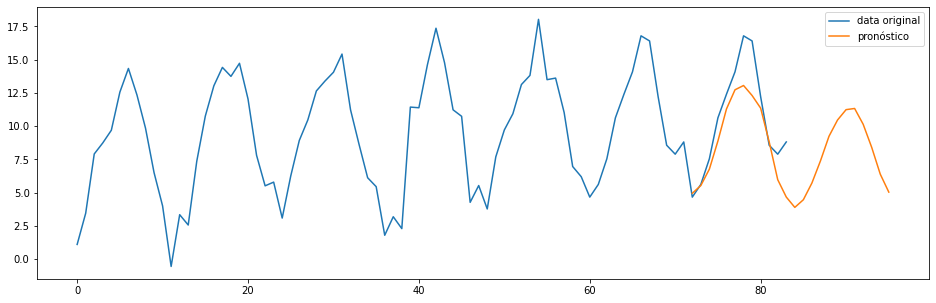

In [104]:
# comparando y_pred, vs y_test
plt.figure(figsize =(16,5))

plt.plot(x,df_total.iloc[:,0].values,label ='data original')
plt.plot(x,df_total.iloc[:,-1].values, label ='pronóstico')
plt.legend(loc = 'best')

# Guardar un Modelo

In [100]:
model.save('my_rnn_model.h5')

# Cargar un Modelo

In [101]:
from keras.models import load_model
new_model = load_model('my_rnn_model.h5')

In [102]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 50)                10400     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
